<a href="https://colab.research.google.com/github/sammed02/Prepinsta-Winter-internship/blob/main/Wintern_internship_week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/train.csv",index_col=0)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
print("number of rows " ,df.shape[0])
print("number of cols " ,df.shape[1])

number of rows  9800
number of cols  17


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9800 entries, 1 to 9800
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9800 non-null   object 
 1   Order Date     9800 non-null   object 
 2   Ship Date      9800 non-null   object 
 3   Ship Mode      9800 non-null   object 
 4   Customer ID    9800 non-null   object 
 5   Customer Name  9800 non-null   object 
 6   Segment        9800 non-null   object 
 7   Country        9800 non-null   object 
 8   City           9800 non-null   object 
 9   State          9800 non-null   object 
 10  Postal Code    9789 non-null   float64
 11  Region         9800 non-null   object 
 12  Product ID     9800 non-null   object 
 13  Category       9800 non-null   object 
 14  Sub-Category   9800 non-null   object 
 15  Product Name   9800 non-null   object 
 16  Sales          9800 non-null   float64
dtypes: float64(2), object(15)
memory usage: 1.3+ MB


In [ ]:
df.isna().sum()


Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy = 'most_frequent')
df['Postal Code'] = imputer.fit_transform(df[["Postal Code"]])

In [ ]:
df.duplicated().sum()

1

In [ ]:
df =df.drop_duplicates()

In [ ]:
df.describe()

,Postal Code,Sales
count,9799.000000,9799.000000
mean,55223.768650,230.763895
std,32060.450682,626.683644
min,1040.000000,0.444000
25%,23223.000000,17.248000
50%,57701.000000,54.480000
75%,90008.000000,210.572000
max,99301.000000,22638.480000


In [ ]:
df.value_counts()

Order ID        Order Date  Ship Date   Ship Mode       Customer ID  Customer Name  Segment      Country        City           State         Postal Code  Region   Product ID       Category         Sub-Category  Product Name                                              Sales  
CA-2015-100006  07/09/2015  13/09/2015  Standard Class  DK-13375     Dennis Kane    Consumer     United States  New York City  New York      10024.0      East     TEC-PH-10002075  Technology       Phones        AT&T EL51110 DECT                                         377.970    1
CA-2018-126396  08/09/2018  12/09/2018  Second Class    AR-10345     Alex Russell   Corporate    United States  Houston        Texas         77070.0      Central  TEC-AC-10003116  Technology       Accessories   Memorex Froggy Flash Drive 8 GB                           85.200     1
CA-2018-126144  31/07/2018  05/08/2018  Standard Class  GM-14680     Greg Matthias  Consumer     United States  Philadelphia   Pennsylvania  19134.0      East 

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns
numeric_cols

Index(['Postal Code', 'Sales'], dtype='object')

In [ ]:
category_cols = df.select_dtypes(include='object').columns
category_cols

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name'],
      dtype='object')

In [ ]:
numeric_df = df[numeric_cols]
category_df = df[category_cols]

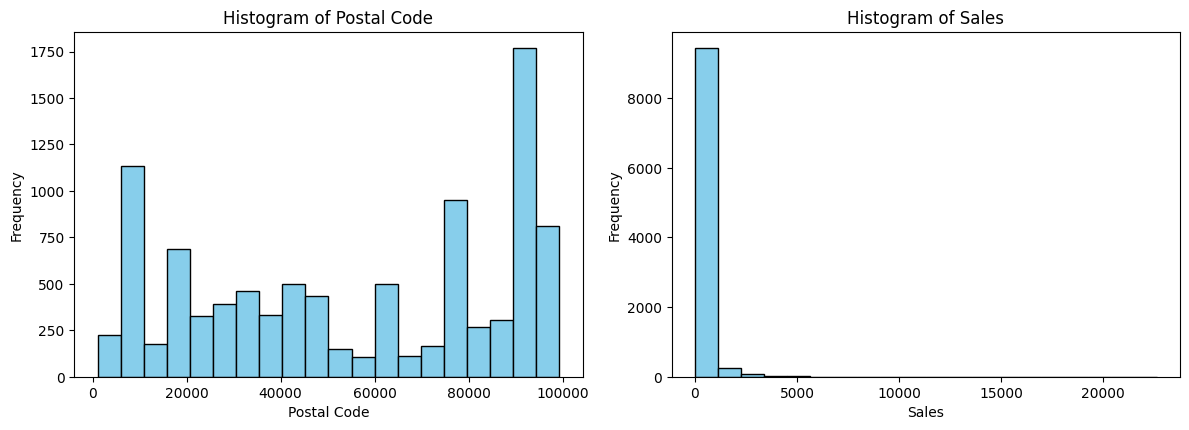

In [ ]:
plt.figure(figsize=(12, 8))

for i, column in enumerate(numeric_df.columns, 1):
    plt.subplot(2, 2, i)
    plt.hist(numeric_df[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

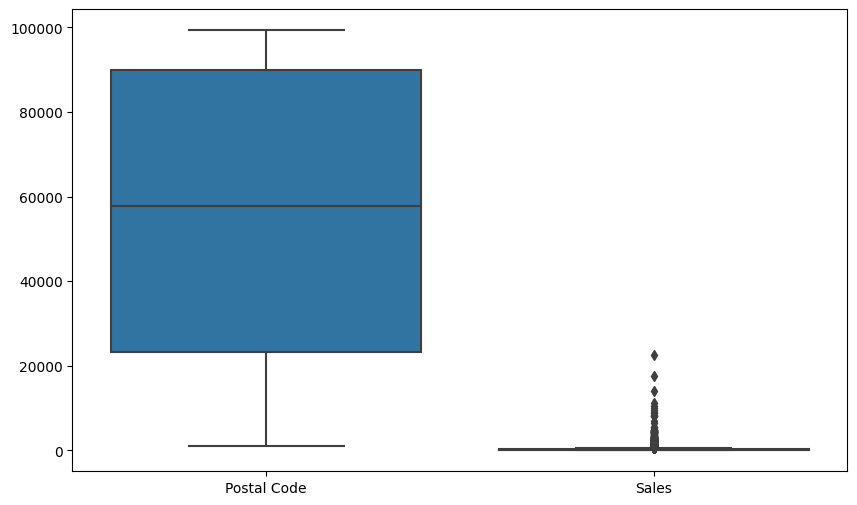

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_df)
plt.show()

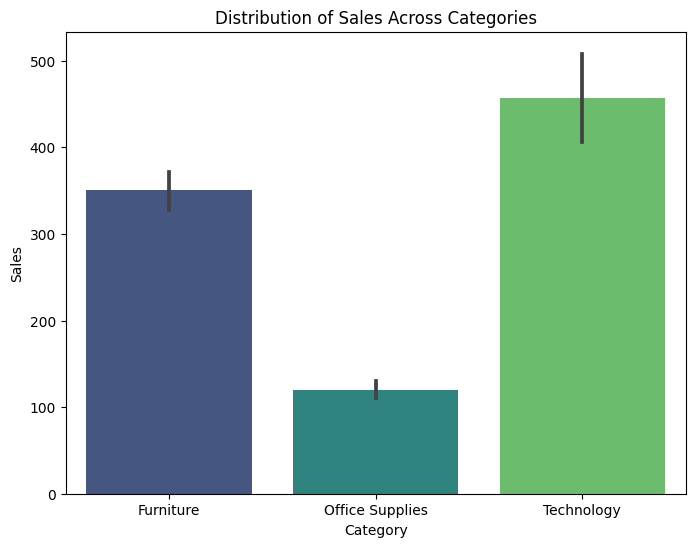

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Sales', data=df, palette='viridis')

plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Distribution of Sales Across Categories')

plt.show()

In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

<ipython-input-20-9d9e7d6e3ad3>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order Date'] = pd.to_datetime(df['Order Date'])
<ipython-input-20-9d9e7d6e3ad3>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Ship Date'] = pd.to_datetime(df['Ship Date'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9799 entries, 1 to 9800
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9799 non-null   object        
 1   Order Date     9799 non-null   datetime64[ns]
 2   Ship Date      9799 non-null   datetime64[ns]
 3   Ship Mode      9799 non-null   object        
 4   Customer ID    9799 non-null   object        
 5   Customer Name  9799 non-null   object        
 6   Segment        9799 non-null   object        
 7   Country        9799 non-null   object        
 8   City           9799 non-null   object        
 9   State          9799 non-null   object        
 10  Postal Code    9799 non-null   float64       
 11  Region         9799 non-null   object        
 12  Product ID     9799 non-null   object        
 13  Category       9799 non-null   object        
 14  Sub-Category   9799 non-null   object        
 15  Product Name   9799 n

In [ ]:
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9797,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9798,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880


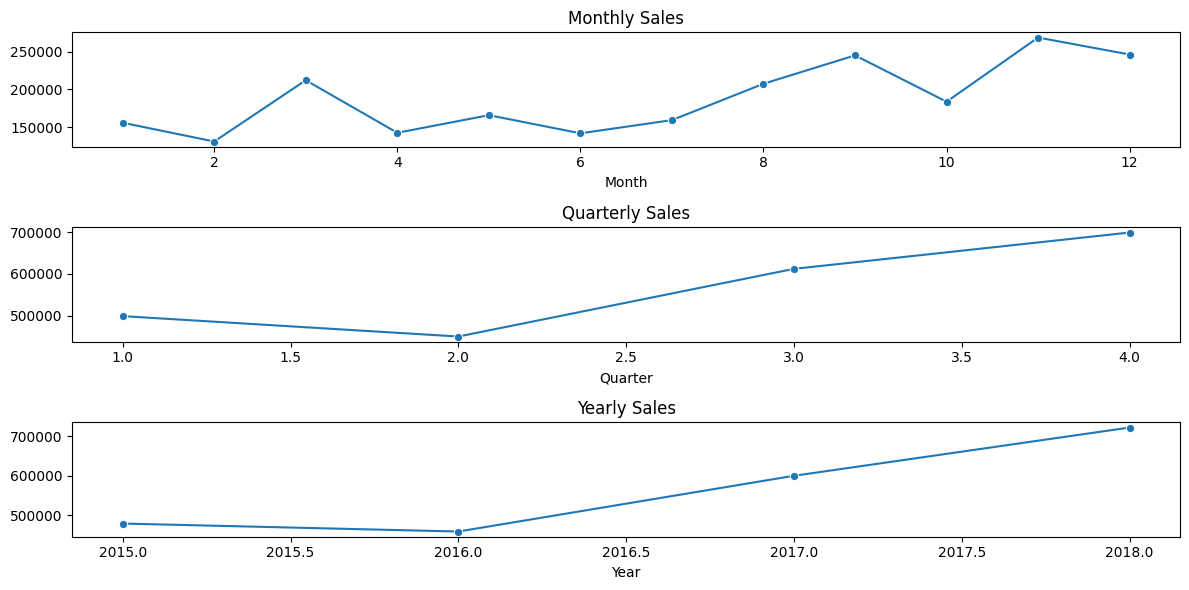

In [ ]:
df['Month'] = df['Order Date'].dt.month
df['Quarter'] = df['Order Date'].dt.quarter
df['Year'] = df['Order Date'].dt.year

monthly_sales = df.groupby('Month')['Sales'].sum()

quarterly_sales = df.groupby('Quarter')['Sales'].sum()

yearly_sales = df.groupby('Year')['Sales'].sum()

plt.figure(figsize=(12, 6))

plt.subplot(3, 1, 1)
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Monthly Sales')

plt.subplot(3, 1, 2)
sns.lineplot(x=quarterly_sales.index, y=quarterly_sales.values, marker='o')
plt.title('Quarterly Sales')

plt.subplot(3, 1, 3)
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, marker='o')
plt.title('Yearly Sales')

plt.tight_layout()
plt.show()

In [ ]:
df.corr()

<ipython-input-24-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Postal Code,Sales,Month,Quarter,Year
Postal Code,1.000000,-0.025441,0.026909,0.028760,0.005577
Sales,-0.025441,1.000000,-0.009922,-0.010355,-0.010613
Month,0.026909,-0.009922,1.000000,0.971863,-0.048782
Quarter,0.028760,-0.010355,0.971863,1.000000,-0.044364
Year,0.005577,-0.010613,-0.048782,-0.044364,1.000000


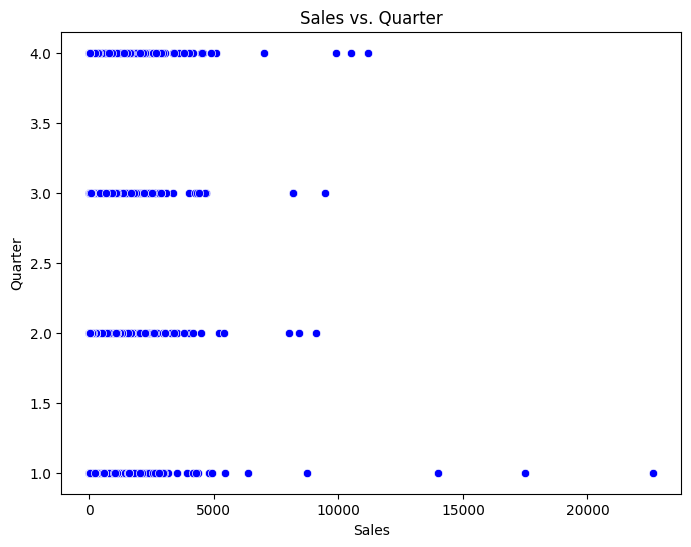

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Sales', y='Quarter', data=df, color='blue', marker='o')

# Set labels and title
plt.xlabel('Sales')
plt.ylabel('Quarter')
plt.title('Sales vs. Quarter')

# Show the plot
plt.show()

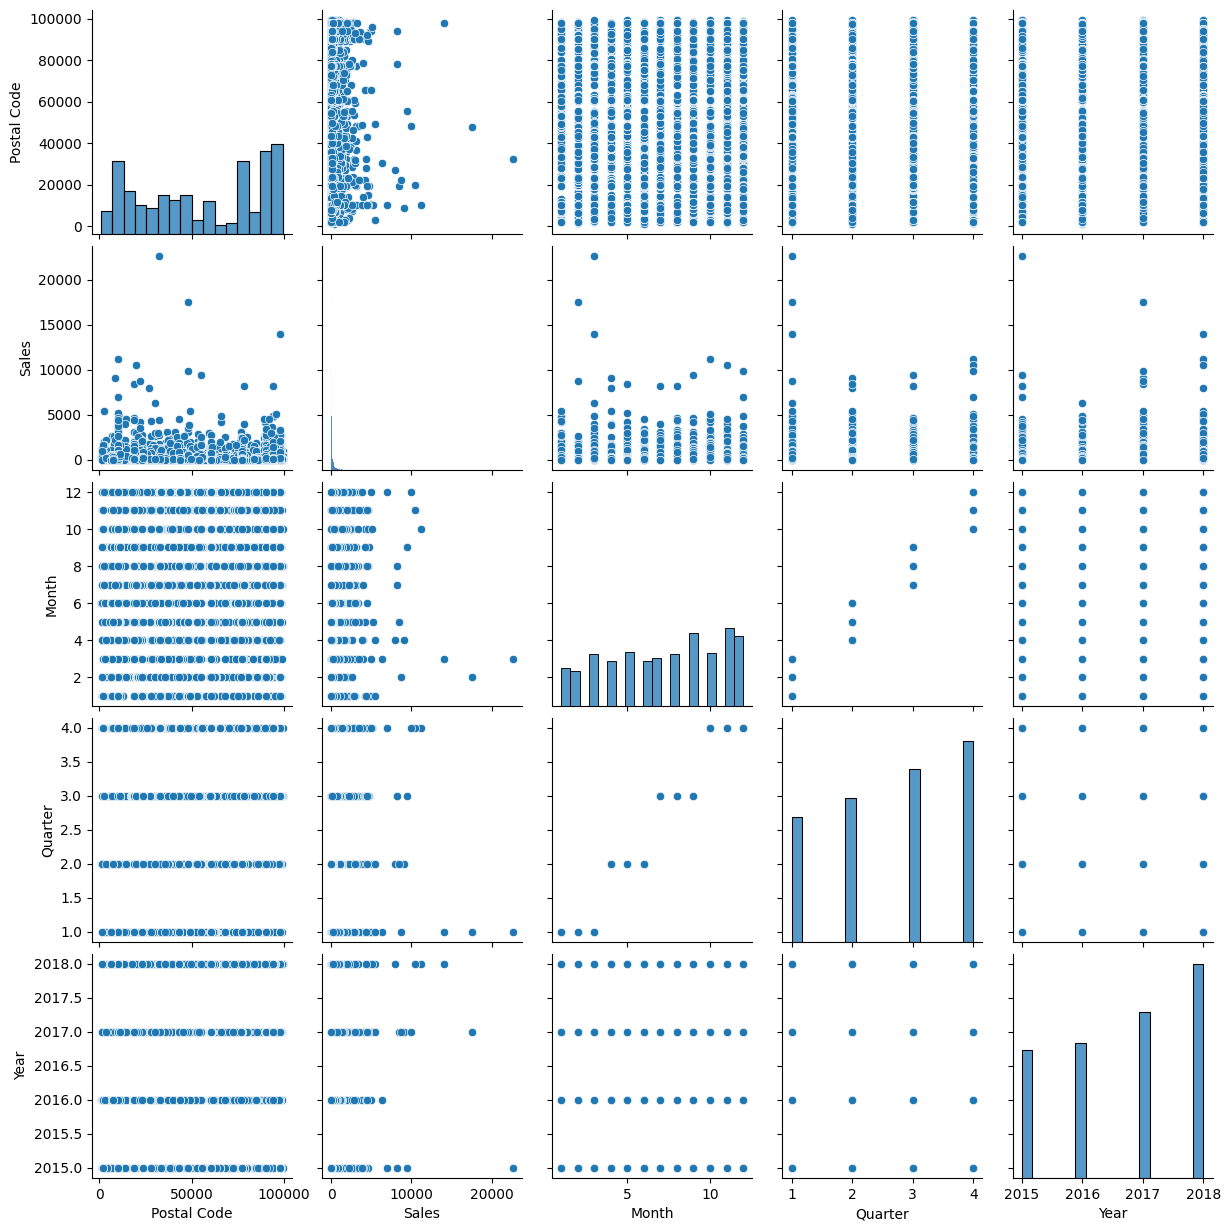

In [ ]:
sns.pairplot(df)

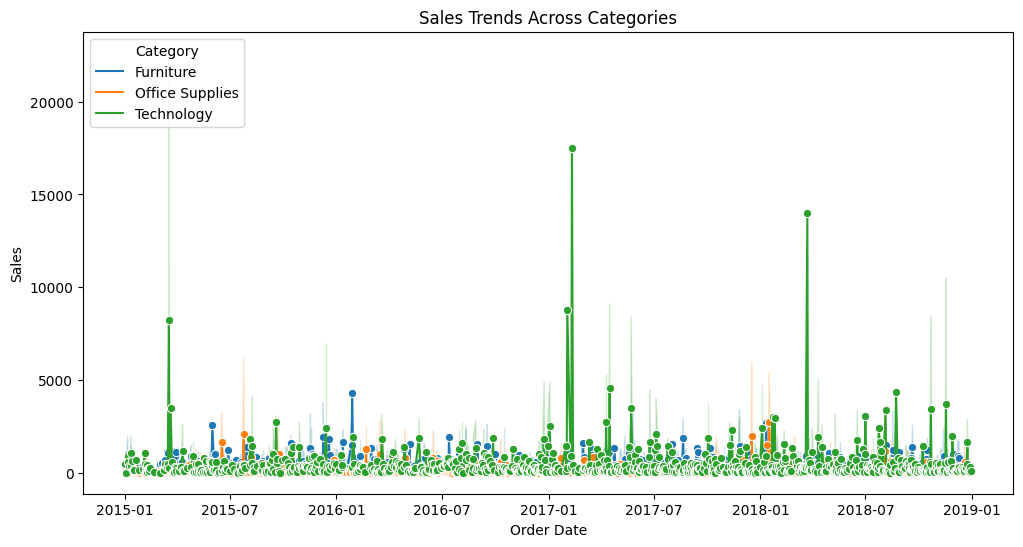

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Order Date', y='Sales', hue='Category', data=df, marker='o', palette='tab10')

plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Sales Trends Across Categories')

plt.legend(title='Category', loc='upper left')
plt.show()

<ipython-input-28-4f5d495d0b95>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


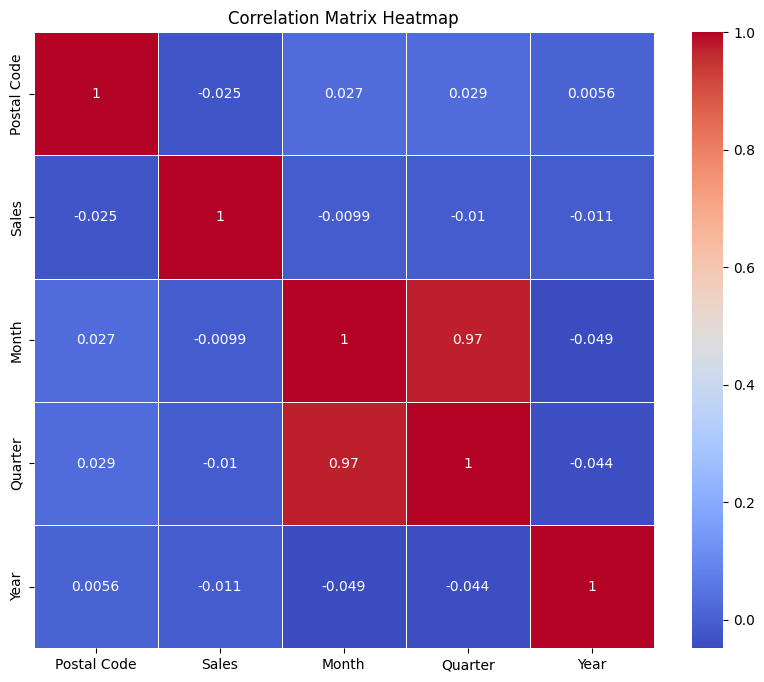

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Matrix Heatmap')

plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=, y=numeric_column, data=subset_df, ci=None)

plt.xlabel('Fuel Type')
plt.ylabel('Ex-Showroom Price')
plt.title('Bar Plot: Ex-Showroom Price vs. Fuel Type')

plt.show()